In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import random

AttributeError: 'MultiPolygon' object has no attribute 'plot'

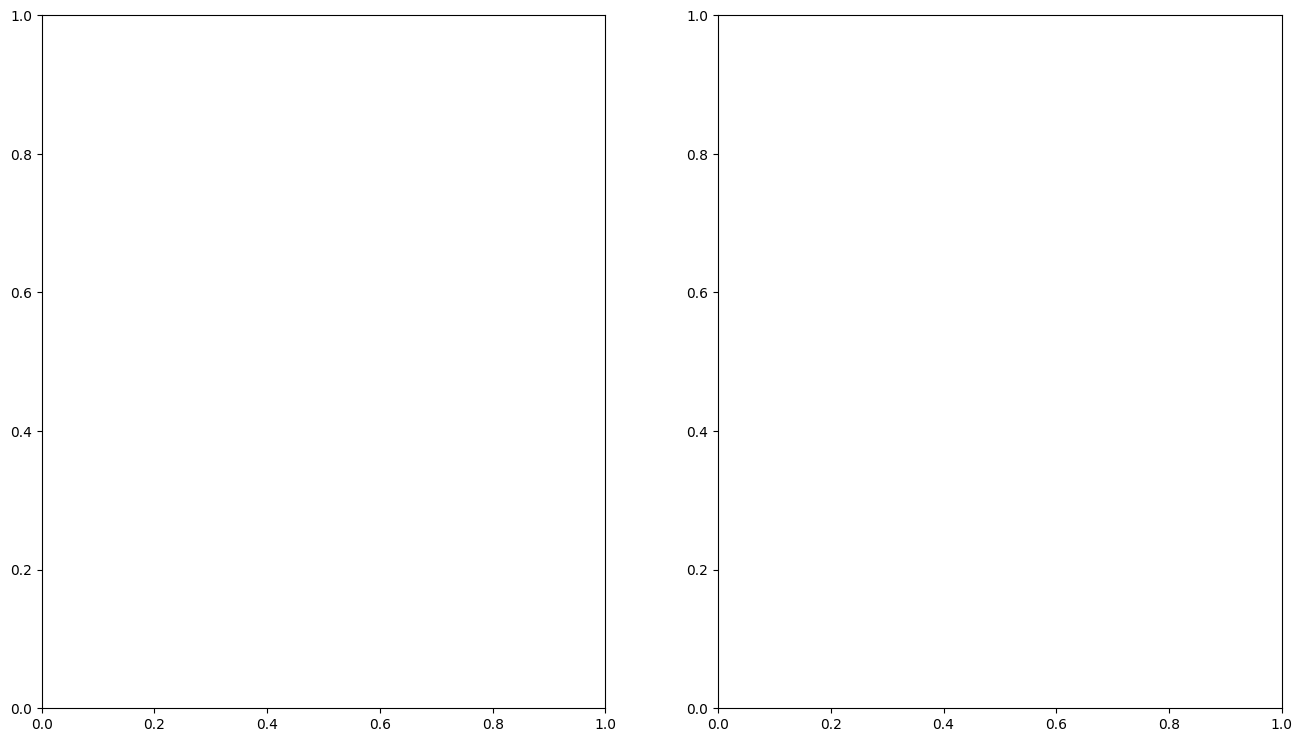

In [8]:
# 1. Load data
df = pd.read_csv('./data/completed/brazilian_ne_annotated_humorous_texts.csv')

# 2. Count annotations per state
state_counts = df['brazilian_state'].value_counts().reset_index()
state_counts.columns = ['brazilian_state', 'annotation_count']

# 3. List of Northeast states
northeast_states = [
    'Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba',
    'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'
]

# 4. Filter to only Northeast
state_counts = state_counts[state_counts['brazilian_state'].isin(northeast_states)]

# 5. Load Brazil state geometries
states = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# 6. Filter only Northeast states
northeast_map = states[states['name'].isin(northeast_states)].copy()

# 7. Merge geometry with annotation counts
northeast_map = northeast_map.merge(state_counts, left_on='name', right_on='brazilian_state')

# 8. Assign distinct colors per state
colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
random.shuffle(colors)
state_colors = {state: colors[i] for i, state in enumerate(northeast_map['name'])}
northeast_map['color'] = northeast_map['name'].map(state_colors)

# 9. Plot map with colored states and embedded annotation counts
fig, ax = plt.subplots(1, 2, figsize=(16, 9))

# Plot each state with its unique color
for idx, row in northeast_map.iterrows():
    row_geometry = row['geometry']
    color = row['color']
    label = row['annotation_count']
    row_geometry.plot(ax=ax[0], color=color, edgecolor='black', linewidth=0.8)
    
    # Add annotation count inside the state's centroid
    centroid = row_geometry.centroid
    ax[0].text(centroid.x, centroid.y, str(label), fontsize=10, ha='center', va='center', color='black', weight='bold')

ax[0].set_title('Annotated Texts by State (Northeast Brazil)', fontsize=14)
ax[0].axis('off')

# 10. Build the color → state table as a legend
ax[1].axis('off')
legend_table = pd.DataFrame({
    'State': northeast_map['name'],
    'Color': northeast_map['color']
}).sort_values('State').reset_index(drop=True)

# Build colored labels for the table
table_data = []
for i, row in legend_table.iterrows():
    patch = mpatches.Patch(color=row['Color'], label=row['State'])
    table_data.append([row['State'], ''])  # Color is visual

# Create the legend manually
for i, row in legend_table.iterrows():
    ax[1].add_patch(mpatches.Rectangle((0.1, 1 - i*0.08), 0.05, 0.05, color=row['Color'], transform=ax[1].transAxes, clip_on=False))
    ax[1].text(0.2, 1 - i*0.08 + 0.015, row['State'], transform=ax[1].transAxes, fontsize=11, va='center')

plt.tight_layout()
plt.show()

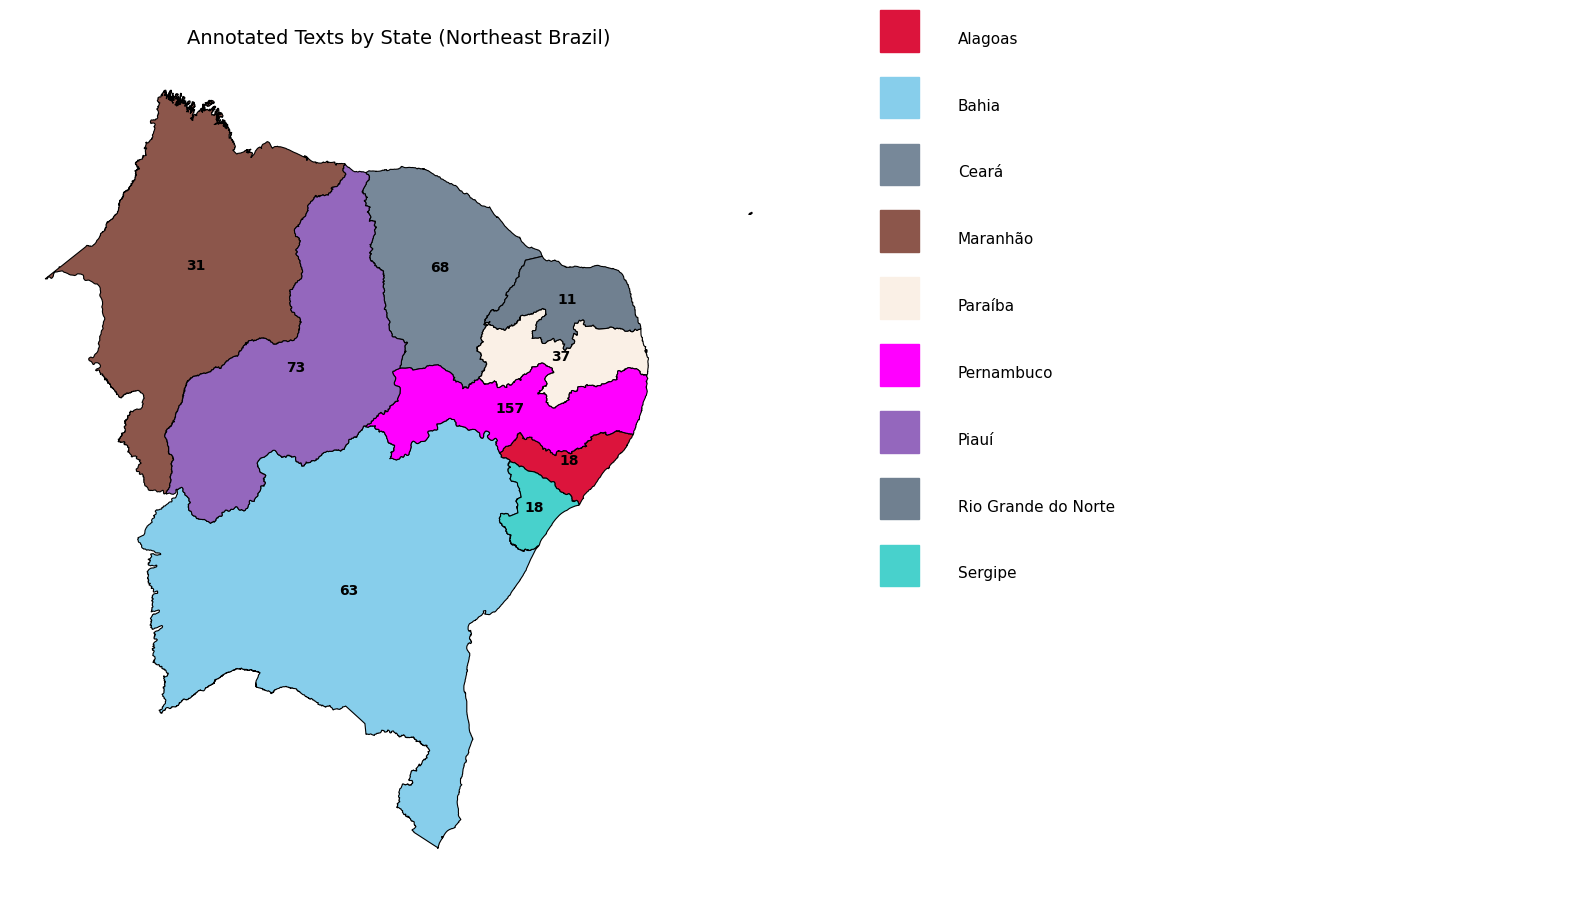

In [10]:
# 1. Load data
df = pd.read_csv('./data/completed/brazilian_ne_annotated_humorous_texts.csv')

# 2. Count annotations per state
state_counts = df['brazilian_state'].value_counts().reset_index()
state_counts.columns = ['brazilian_state', 'annotation_count']

# 3. List of Northeast states
northeast_states = [
    'Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba',
    'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'
]

# 4. Filter to only Northeast
state_counts = state_counts[state_counts['brazilian_state'].isin(northeast_states)]

# 5. Load Brazil state geometries
states = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# 6. Filter only Northeast states
northeast_map = states[states['name'].isin(northeast_states)].copy()

# 7. Merge geometry with annotation counts
northeast_map = northeast_map.merge(state_counts, left_on='name', right_on='brazilian_state')

# 8. Assign distinct colors per state
colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
random.shuffle(colors)
state_colors = {state: colors[i] for i, state in enumerate(northeast_map['name'])}
northeast_map['color'] = northeast_map['name'].map(state_colors)

# 9. Plot map using full GeoDataFrame
fig, ax = plt.subplots(1, 2, figsize=(16, 9))

# Plot full GeoDataFrame with custom colors
northeast_map.plot(
    ax=ax[0],
    color=northeast_map['color'],
    edgecolor='black',
    linewidth=0.8
)

# Add annotation count inside each state using centroid
for idx, row in northeast_map.iterrows():
    centroid = row['geometry'].centroid
    ax[0].text(centroid.x, centroid.y, str(row['annotation_count']),
               fontsize=10, ha='center', va='center', color='black', weight='bold')

ax[0].set_title('Annotated Texts by State (Northeast Brazil)', fontsize=14)
ax[0].axis('off')

# 10. Build the legend manually (name-color table)
ax[1].axis('off')
legend_table = pd.DataFrame({
    'State': northeast_map['name'],
    'Color': northeast_map['color']
}).sort_values('State').reset_index(drop=True)

# Add colored squares and labels
for i, row in legend_table.iterrows():
    ax[1].add_patch(mpatches.Rectangle((0.1, 1 - i*0.08), 0.05, 0.05,
                                       color=row['Color'], transform=ax[1].transAxes, clip_on=False))
    ax[1].text(0.2, 1 - i*0.08 + 0.015, row['State'],
               transform=ax[1].transAxes, fontsize=11, va='center')

plt.tight_layout()
plt.show()